# Ans 1

In Matrix multiplication between an (n,k) matrix and a (k,m) matrix, we multiply each n x k matrix element with each corresponding element of the k x m matrix.

The resulting matrix would be an n x m matrix. To every element in this matrix, we have performed k multiplications and (k-1) additions because we multiply corresponding elements from the row of the first matrix and the column of the second matrix and then sum these products.

Hence, for n x m elements in the resulting matrix, the total number of multiplications required is
 ##### n x m x k.

 And the total number of additions required would be 
 ##### n x m x k x (k-1).

# Ans 2

### Using list of lists

In [14]:
def matrix_multiply(a, b):
    if len(a[0]) != len(b):
        raise ValueError("Matrix multiplication is not possible")

    result = [[0 for p in range(len(b[0]))] for p in range(len(a))]

    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k] * b[k][j]

    return result

# Example matrices
matrix_a = [
    [4, 7],
    [3, 4],
    [8, 2]
]

matrix_b = [
    [1, 4, 4],
    [15, 11, 13]
]

result_list = matrix_multiply(matrix_a, matrix_b)
print(result_list)


[[109, 93, 107], [63, 56, 64], [38, 54, 58]]


### Using Numpy

In [15]:
import numpy as np

# Example matrices
matrix_a_np = np.array(matrix_a)
matrix_b_np = np.array(matrix_b)

result_np = np.dot(matrix_a_np, matrix_b_np)
print(result_np)


[[109  93 107]
 [ 63  56  64]
 [ 38  54  58]]


Numpy operations are faster than regular Python list operations because, in Python lists, an iterative approach is used; the iterator goes up to every element and performs a particular set of operations with the other element, while in NumPy, it is a Python library and it performs the optimized code under the hood and hence executes faster operations.

### Time required for both the methods

In [24]:
import timeit

# Timing the list-based matrix multiplication
time_list = timeit.timeit(lambda: matrix_multiply(matrix_a, matrix_b), number=1000)

# Timing the NumPy matrix multiplication
time_np = timeit.timeit(lambda: np.dot(matrix_a_np, matrix_b_np), number=1000)

print("Time taken for list-based multiplication:", time_list)
print("Time taken for NumPy multiplication:", time_np)


Time taken for list-based multiplication: 0.011861399980261922
Time taken for NumPy multiplication: 0.0071044000796973705


# Ans 3

Using the given method, the time complexity of finding the median would be ${O(n^2)}$ because for finding the highest number requires one pass and finding the second highest requires another pass, hence for finding the median it will require atleast (n/2)th pass of the highest element.

A better method would be to sort the array using quick sort and then find the median, making the time complexity ${O(nlogn)}$.

### Python code for finding the median using the highest and second highest element in the array.

In [17]:
def find_median_highest_second_highest(arr):
    if len(arr) % 2 == 1:
        # Implies Odd length, finding (n+1)/2th highest element
        median_index = (len(arr) + 1) // 2
        for i in range(median_index):
            highest = max(arr)
            arr.remove(highest)
        return highest
    else:
        # Implies Even length, taking the average of (n/2)th and (n/2+1)th highest elements
        first_median = find_median_highest_second_highest(arr[: len(arr) // 2])
        second_median = find_median_highest_second_highest(arr[len(arr) // 2 :])
        return (first_median + second_median) / 2


### Python code for finding the median using sorting(the better method)

In [18]:
def median_via_sort(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 != 0:
        return sorted_arr[n // 2]
    else:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2


### Python code for finding median using numpy

In [44]:


# Finding median using NumPy
median_np = np.median(arr)
print("Median using NumPy:", median_np)


Median using NumPy: 28.5


### Comparing execution times using timeit

In [45]:
import timeit
numpy_time = timeit.timeit(lambda: np.median(arr), number=100)
method1_time = timeit.timeit(lambda: find_median_highest_second_highest(arr), number=100)
method2_time = timeit.timeit(lambda: median_via_sort(arr), number=100)

print("Numpy median time:", numpy_time)
print("Method 1 time:", method1_time)
print("Method 2 time:", method2_time)

Numpy median time: 0.0014691001269966364
Method 1 time: 0.00025109993293881416
Method 2 time: 0.00025739986449480057


We can see a discrepency from the expected result, the numpy method should be faster than both the methods and the correct order should be:- 

numpy method>sorting method>highest second highest method

This dicrepency could be because of smaller arrays being taken as example.

# Ans 4

Let the function be f(x,y) = ${x^2y + y^3sin(x)}$

### Partial derivative with respect to x

${df/dx}$ = ${2xy + y^3cos(x)}$

### Partial derivative with respect to y

${df/dy}$ = ${x^2 + 3y^2sin(x)}$

Hence the gradient of the function would be:-

${(df/dx,df/dy)}$ = ${(2xy + y^3cos(x), x^2 + 3y^2sin(x))}$





# Ans 5

In [19]:
!pip install jax
!pip install jax jaxlib

import jax
import jax.numpy as jnp


def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Defining a function to compute the gradient
grad_f = jax.grad(f, argnums=(0, 1))

# Defining some random values for x and y
x_val = 2.0
y_val = 3.0


# Computing the analytical gradient using the formula in the above question
analytical_gradient = (2 * x_val * y_val + y_val**3 * jnp.cos(x_val), x_val**2 + 3 * y_val**2 * jnp.sin(x_val))

# Computing the gradient using JAX
jax_gradient = grad_f(x_val, y_val)

# Compare the analytical gradient with the JAX computed gradient
print("Analytical Gradient:", analytical_gradient)
print("JAX Computed Gradient:", jax_gradient)



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Analytical Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))
JAX Computed Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### We can see that the analytical and the Jax gradient are matching and the answer at x=2 and y=3 is:-

(0.7640352 , 28.55103)

# Ans 6

In [21]:
!pip install sympy
import sympy as sp

# Defining the variables
x, y = sp.symbols('x y')

# Defining the function
f = x**2 * y + y**3 * sp.sin(x)

# Computing partial derivatives
partial_x = sp.diff(f, x)
partial_y = sp.diff(f, y)

# Displaying the partial derivatives
print("Partial derivative of f with respect to x:", partial_x)
print("Partial derivative of f with respect to y:", partial_y)


     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.7 MB 262.6 kB/s eta 0:00:22
     ---------------------------------------- 0.1/5.7 MB 363.1 kB/s eta 0:00:16
      --------------------------------------- 0.1/5.7 MB 654.9 kB/s eta 0:00:09
     - -------------------------------------- 0.2/5.7 MB 748.1 kB/s eta 0:00:08
     - -------------------------------------- 0.2/5.7 MB 827.9 kB/s eta 0:00:07
     -- ------------------------------------- 0.4/5.7 MB 1.3 MB/s eta 0:00:05
     ---- ----------------------------------- 0.6/5.7 MB 1.6 MB/s eta 0:00:04
     ----- ---------------------------------- 0.8/5.7 MB 2.1 MB/s eta 0:00:03
     ----- ---------------------------------- 0.8/5.7 MB 1.9 MB/s eta 0:00:03
     ------- -------------------------------- 1.1/5.7 MB 2.3 MB/s eta 0:00:


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Partial derivative of f with respect to x: 2*x*y + y**3*cos(x)
Partial derivative of f with respect to y: x**2 + 3*y**2*sin(x)


### As we can see, sympy computes the same result as produced analytically

# Ans 7

### Python nested dictionary to represent hierarchical information

In [34]:
data = {
    2022: {
        "Branch 1": {
            "Roll Number": 1,
            "Name": "N",
            "Marks": {
                "Maths": 100,
                "English": 70,
                # more subjects and marks here
            },
        },
        "Branch 2": {
            # student data for Branch 2 in 2022
        },
    },
    2023: {
        "Branch 1": {
            # student data for Branch 1 in 2023
        },
        "Branch 2": {
            # student data for Branch 2 in 2023
        },
    },
    # data for other years (2024, 2025)
}

# We can access the data as well using the following code
# To Get all branches for 2022
branches_2022 = data[2022].keys()
print('All branches in 2022', branches_2022)

# To Get marks for student in Branch 1, 2022
marks_student_1_branch_1_2022 = data[2022]["Branch 1"]["Marks"]

print('Marks of student 1 in branch 1 in 2022', marks_student_1_branch_1_2022)

# To Print all student data for Branch 2, 2023
print(data[2023]["Branch 2"])

All branches in 2022 dict_keys(['Branch 1', 'Branch 2'])
Marks of student 1 in branch 1 in 2022 {'Maths': 100, 'English': 70}
{}


# Ans 8

### Storing the information using python classes

In [15]:
class Student:
    def __init__(object, roll_number, name):
        object.roll_number = roll_number
        object.name = name
        object.marks = {}  # Dictionary to store marks for each subject

    def add_mark(object, subject, mark):
        object.marks[subject] = mark


class Branch:
    def __init__(object, name):
        object.name = name
        object.students = []

    def add_student(object, student):
        object.students.append(student)


class Year:
    def __init__(object, year):
        object.year = year
        object.branches = []

    def add_branch(object, branch):
        object.branches.append(branch)


### Creating instances of these classes and organizing the data

In [16]:

student1 = Student(1, "N")
student1.add_mark("Maths", 100)
student1.add_mark("English", 70)


# Creating branches and adding students
branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(student1)
# Similarly, we can add more students to Branch 1 or other branches 

# Creating years and adding branches
year_2022 = Year(2022)
year_2022.add_branch(branch1_2022)
# Similarly, we can add more branches to year_2022 or other years similarly

# We can create more years and organize branches and students similarly

# Creating the database as a list of year objects
database = [year_2022, Year(2023), Year(2024), Year(2025)]

print(database)


[<__main__.Year object at 0x00000240A8727F20>, <__main__.Year object at 0x00000240A87263C0>, <__main__.Year object at 0x00000240A99FD5B0>, <__main__.Year object at 0x00000240A99FC2F0>]


# Ans 9

## a) y = x

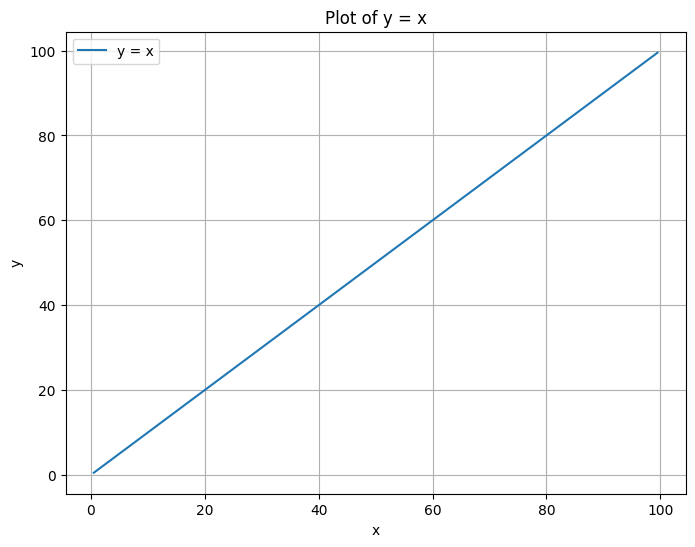

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = x
y = x

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.legend()
plt.grid(True)
plt.show()


## b) y = ${x^2}$

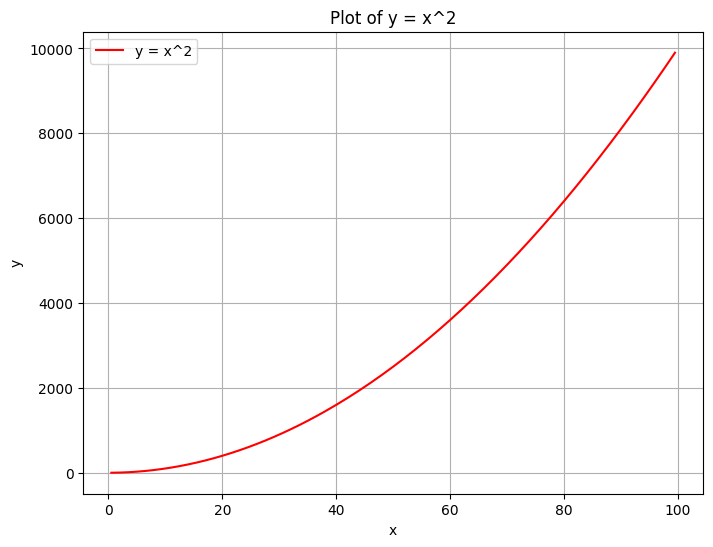

In [28]:

x = np.arange(0.5, 100.0, 0.5)


y = x**2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^2', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.legend()
plt.grid(True)
plt.show()




## c) ${x^3/100}$


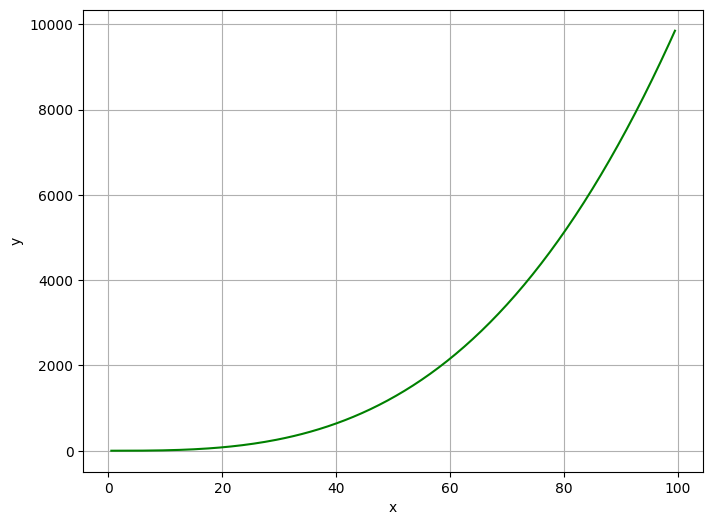

In [27]:

x = np.arange(0.5, 100.0, 0.5)


y = (x**3) / 100

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^3 / 100', color='green')
plt.xlabel('x')
plt.ylabel('y')


plt.grid(True)
plt.show()


## d) y = sin(x)

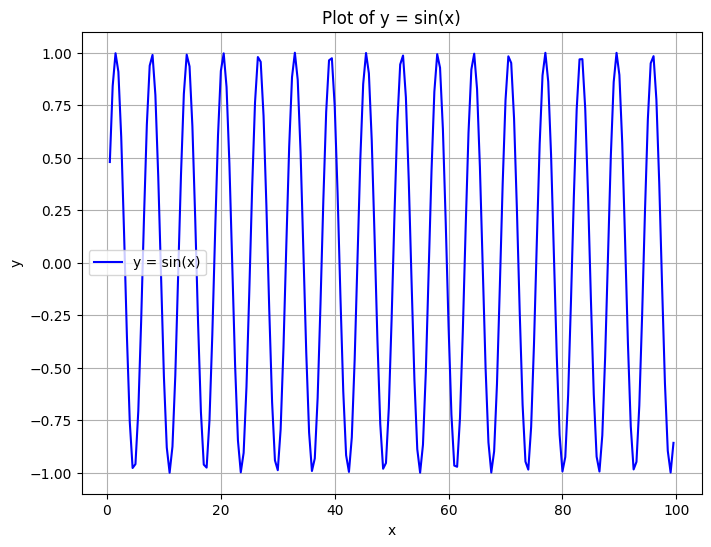

In [26]:


x = np.arange(0.5, 100.0, 0.5)


y = np.sin(x)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = sin(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.legend()
plt.grid(True)
plt.show()


## e) ${y = sin(x)/x}$

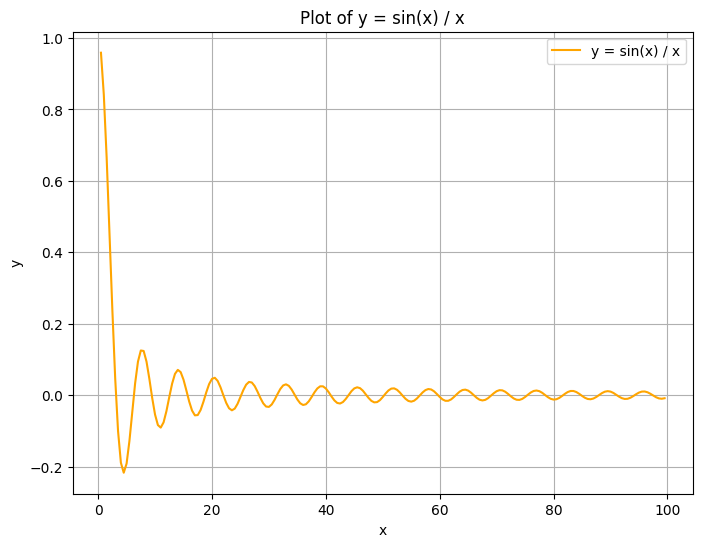

In [25]:

x = np.arange(0.5, 100.0, 0.5)


y = np.sin(x) / x

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = sin(x) / x', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x) / x')
plt.legend()
plt.grid(True)
plt.show()


## f) ${y = log(x)}$

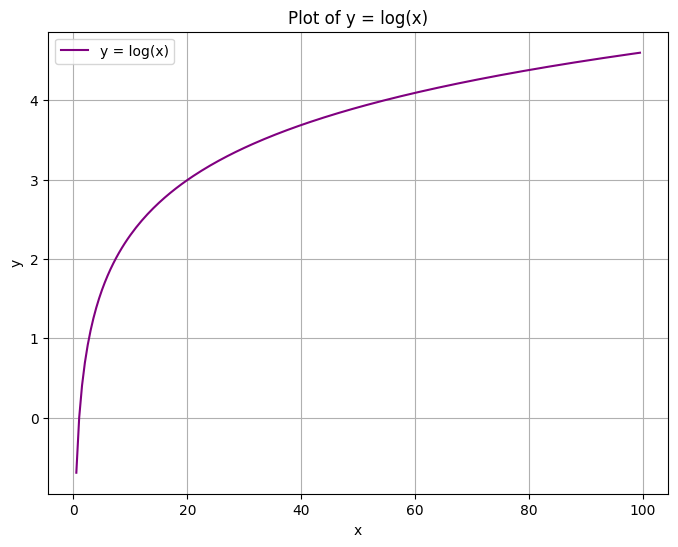

In [11]:

x = np.arange(0.5, 100.0, 0.5)

# Define the function y = log(x)
y = np.log(x)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = log(x)', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.legend()
plt.grid(True)
plt.show()


## g) ${y = e^x}$

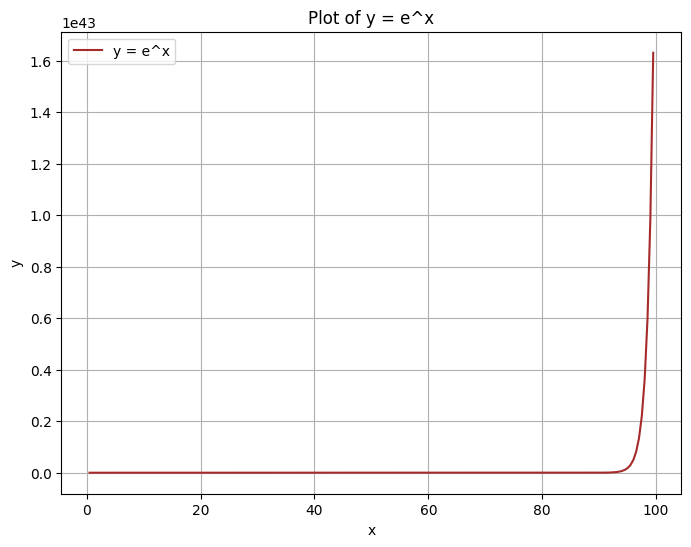

In [12]:
x = np.arange(0.5, 100.0, 0.5)

# Define the function y = e^x
y = np.exp(x)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = e^x', color='brown')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.legend()
plt.grid(True)
plt.show()


# Ans 10

In [41]:
import numpy as np
import pandas as pd

# Generating a matrix of size 20x5 with random numbers from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Creating a DataFrame with columns named "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Finding the column with the highest standard deviation
highest_std_column = df.std().idxmax()

# Finding the row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()

print(f"Column with the highest standard deviation: {highest_std_column}")
print(f"Row with the lowest mean: {lowest_mean_row}")


Column with the highest standard deviation: d
Row with the lowest mean: 11


# Ans 11

In [43]:
# Adding a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Creating column "g" based on condition
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Finding the number of rows where the value in column "g" is "LT8"
LT8_count = df[df['g'] == 'LT8'].shape[0]

# Finding standard deviation of column "f" for rows where value in column "g" is "LT8" and "GT8"
std_LT8 = df[df['g'] == 'LT8']['f'].std()
std_GT8 = df[df['g'] == 'GT8']['f'].std()

print(f"Number of rows where 'g' is 'LT8': {LT8_count}")
print(f"Standard deviation of 'f' where 'g' is 'LT8': {std_LT8}")
print(f"Standard deviation of 'f' where 'g' is 'GT8': {std_GT8}")


Number of rows where 'g' is 'LT8': 16
Standard deviation of 'f' where 'g' is 'LT8': 0.6043590362573562
Standard deviation of 'f' where 'g' is 'GT8': 0.4301502968263786


# Ans 12

### Broadcasting in NumPy is a feature that allows arrays with different shapes to be used together for several element wise operations such as addtion,subtraction and multiplication etc. Following is the code to explain this.


In [4]:
import numpy as np

# Creating two NumPy arrays
arr1 = np.array([[6, 2, 9],
                 [12, 15, 16]])

arr2 = np.array([0, 20, 25])

# Performing addition using broadcasting
result = arr1 + arr2

print("Array 1:")
print(arr1)
print("\nArray 2:")
print(arr2)
print("\nResult of broadcasting:")
print(result)


Array 1:
[[ 6  2  9]
 [12 15 16]]

Array 2:
[ 0 20 25]

Result of broadcasting:
[[ 6 22 34]
 [12 35 41]]


#### In the above example, arr1 has a shape of (2, 3) and arr2 has a shape of (3,). Despite their different shapes, NumPy broadcasts the smaller array (arr2) across the larger one (arr1) by extending it to match the shape needed for the operation. The arr2 array is stretched to match the shape of arr1 in order to perform the addition operation element-wise.

# Ans 13

### Following is the function to compute argmin of a NumPy array

In [12]:
import numpy as np

def not_npargmin(arr):
    # Finding the minimum value in the array
    min_val = np.min(arr)
    
    # Finding the index of the minimum value in the array
    index = np.where(arr == min_val)[0][0]
    
    return index


### Verifying the result using np.argmin

In [13]:
# Example usage:
array = np.array([15, 12, 2, 3, 5])
index_not_npargmin = not_npargmin(array)
index_np = np.argmin(array)

print("Not npargmin result:", index_custom)
print("np.argmin result:", index_np)


Not npargmin result: 2
np.argmin result: 2
